# まずぼかす

### 3x3のフィルタ

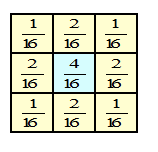 

|  |  |  |  
|:-- : |:-- : |:-- : |  
| (-1, -1) | (0, -1) | (1, -1) |  
| (-1, 0)  | (0, 0) | (1, 0)  |  
| (-1, 1)  | (0, 1) | (1, 1) |  

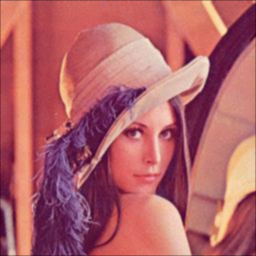

In [43]:
from IPython.display import Image 
import numpy as np
from PIL import Image
from scipy.signal import fftconvolve

img = Image.open('lena.png')
img_array = np.asarray(img).transpose(2, 0, 1)

def gaussian(size, sigma):
    # 3x3のガウシアンフィルタ
    width = size // 2
    xmesh, ymesh = np.meshgrid(
        np.arange(-width, width + 1),
        np.arange(-width, width + 1)
    )
    dist = xmesh**2 + ymesh**2
    return np.exp(-dist / (2*sigma**2)) / (2*np.pi*sigma**2)

G_3x3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16
out_by3x3 = np.zeros(img_array.shape)
for i in range(out_by3x3.shape[0]):
    out_by3x3[i] = fftconvolve(img_array[i], G_3x3, mode='same')

out_img_by3x3 = Image.fromarray(np.uint8(out_by3x3.transpose(1, 2, 0)))
display(out_img_by3x3)

In [49]:
kernel = gaussian(3, 0.8)
kernel / kernel.sum()

array([[0.05711826, 0.12475775, 0.05711826],
       [0.12475775, 0.27249597, 0.12475775],
       [0.05711826, 0.12475775, 0.05711826]])

In [35]:
G_3x3 = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ]) / 16
G_3x3

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [42]:
G_3x3 = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
]) / 16

s = 1.3
size = 3
def blur_by_gaussian(size, s):
    width = size // 2
    xmesh, ymesh = np.meshgrid(
        np.arange(-width, width + 1),
        np.arange(-width, width + 1)
    )
    dist = xmesh**2 + ymesh**2
    print(dist)

    kernel = np.exp(-dist / (2 * s**2)) / (np.sqrt(2 * np.pi) * s**2)
    return 
print('kernel', kernel)
print()
print('gauss', G_3x3)

kernel [[0.16981957 0.22828492 0.16981957]
 [0.22828492 0.30687868 0.22828492]
 [0.16981957 0.22828492 0.16981957]]

gauss [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


### 5x5のフィルタ
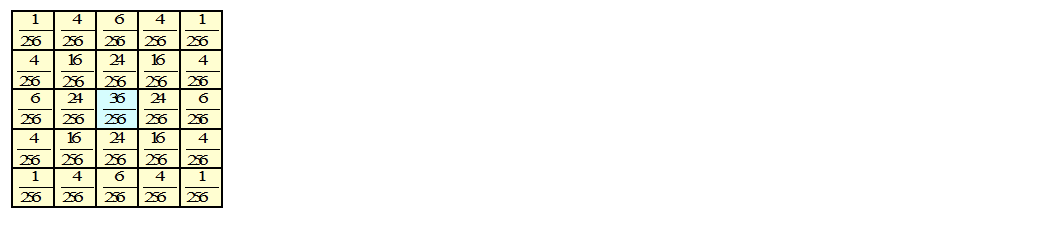

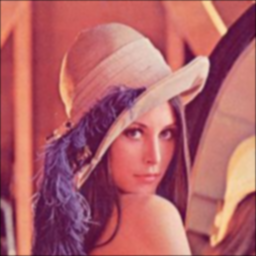

In [7]:
from IPython.display import Image 
import numpy as np
from PIL import Image
from scipy.signal import fftconvolve

img = Image.open('lena.png')
img_array = np.asarray(img).transpose(2, 0, 1)


# 5x5のガウシアンフィルタs
G_5x5 = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256

out_by5x5 = np.zeros(img_array.shape)
for i in range(out_by5x5.shape[0]):
    out_by5x5[i] = fftconvolve(img_array[i], G_5x5, mode='same')

out_img_by5x5 = Image.fromarray(np.uint8(out_by5x5.transpose(1, 2, 0)))
display(out_img_by5x5)

# 戻す

フーリエ領域  
ガウスフィルタ 